## Exploration

Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal. Use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [1]:
# manipulations imports
import pandas as pd
import numpy as np

# viz imports
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#stats imports
from scipy.stats import pearsonr, spearmanr, ttest_ind

# my imports
import wrangle
import explore

In [2]:
df =  wrangle.wrangle_zillow()

In [3]:
train, validate, test = wrangle.split_data(df)

train: 1284141 (60.0% of 2140235)
validate: 428047 (20.0% of 2140235)
test: 428047 (20.0% of 2140235)


### 1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.
 

In [4]:
def plot_variable_pairs(df):
    """
    Plot pairwise relationships with regression lines for each pair of variables in the dataframe.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - Pairwise scatter plots with regression lines.
    """
    # Set the style for the plots
    sns.set(style="ticks")

    # Create a pairplot with regression lines
    pair_plot = sns.pairplot(df, kind="reg", diag_kind="kde")

    # Show the plot
    plt.show()


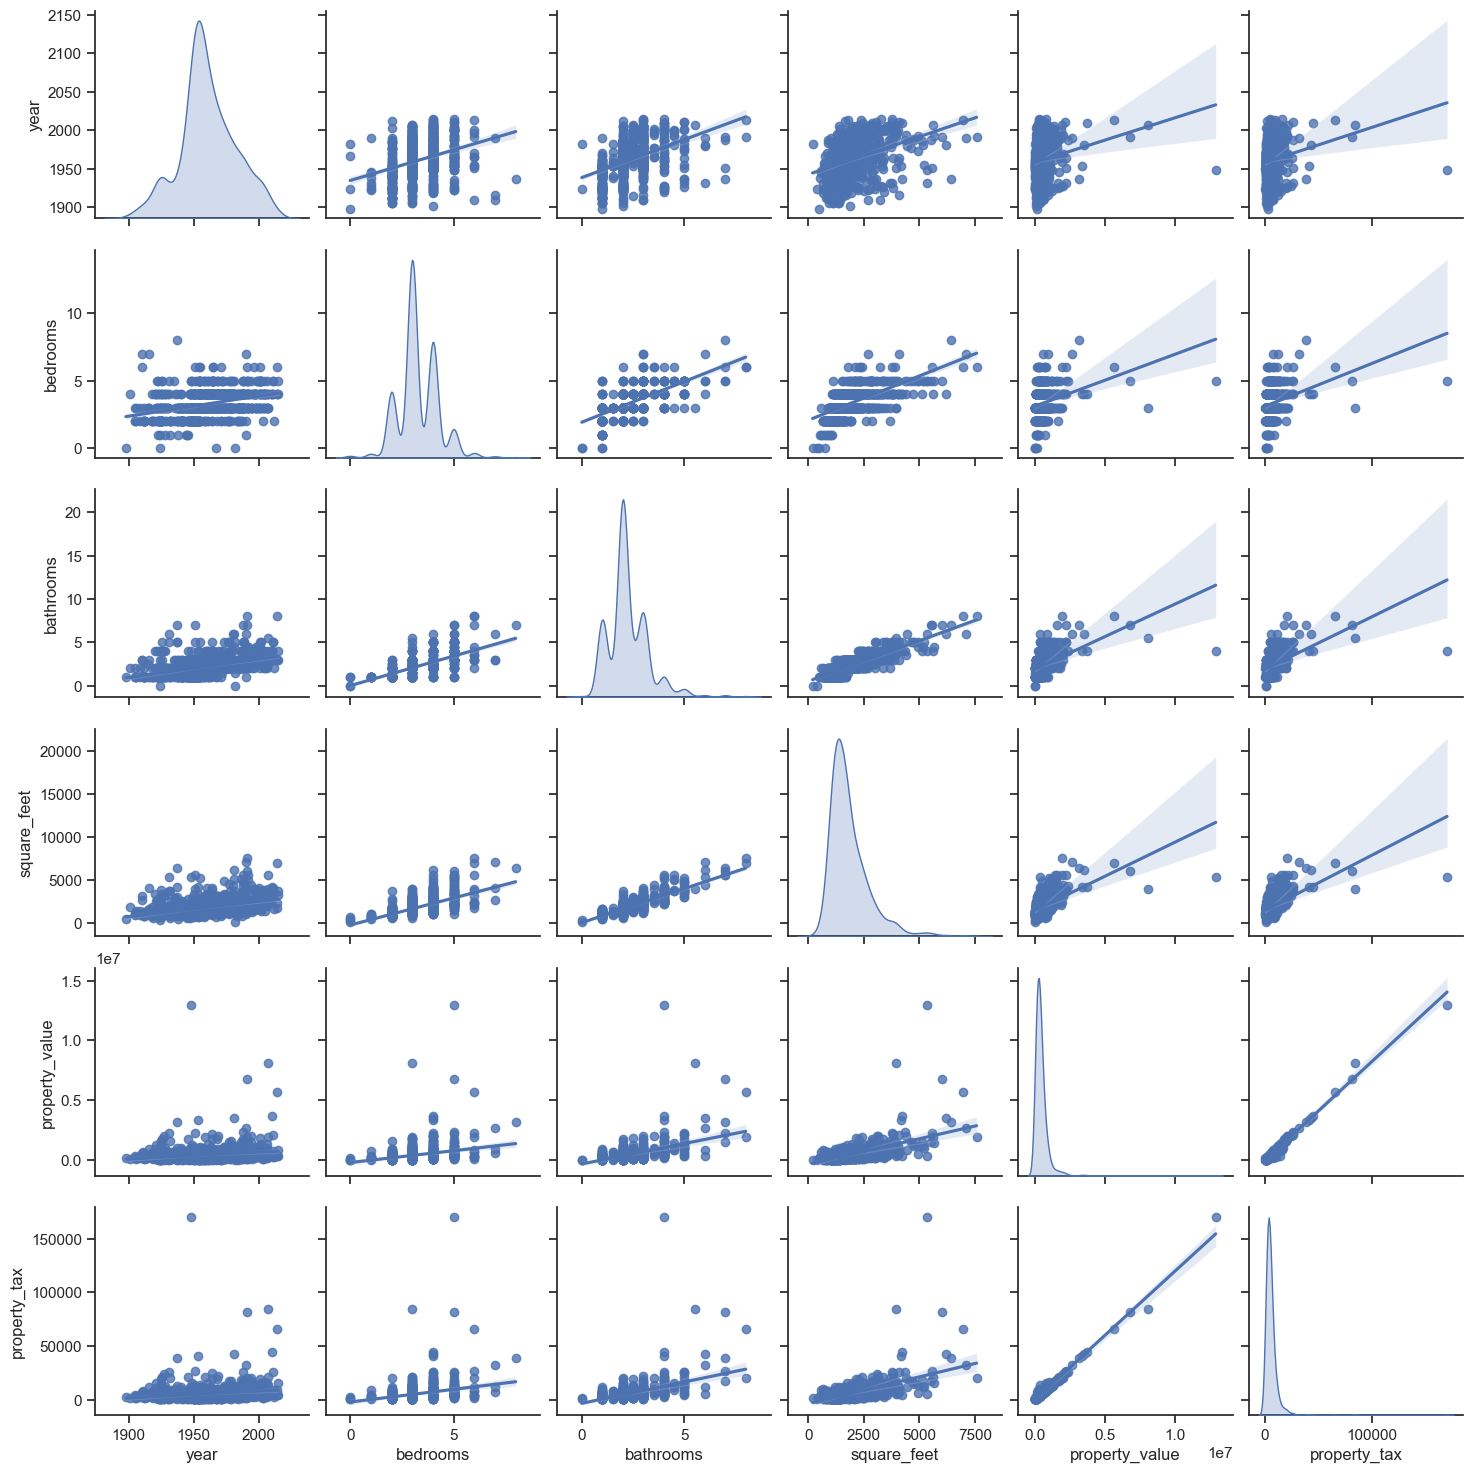

In [5]:
# Example usage:
# Assuming your DataFrame is named 'df'
plot_variable_pairs(train.sample(1000))

 
### 2. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
 

In [6]:
def plot_categorical_and_continuous_vars(df, cat_cols, con_cols):
    """
    Plot three different visualizations for the relationship between
    categorical variables and continuous variables.

    Parameters:
    - df: DataFrame, the input dataframe.
    - cat_cols: list, names of columns holding categorical variables.
    - con_cols: list, names of columns holding continuous variables.
    """
    for cat_var in cat_cols:
        for con_var in con_cols:

            # Plot 1: Boxplot
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            sns.boxplot(x=cat_var, y=con_var, data=df)
            plt.title(f'Boxplot of {con_var} by {cat_var}')

            # Plot 2: Violin plot
            plt.subplot(1, 3, 2)
            sns.violinplot(x=cat_var, y=con_var, data=df)
            plt.title(f'Violin Plot of {con_var} by {cat_var}')

            # Plot 3: Hist plot
            plt.subplot(1, 3, 3)
            for category in df[cat_var].unique():
                sns.histplot(df[df[cat_var] == category][con_var], label=category, alpha=0.5, kde=True)
            plt.title(f'Histogram of {con_var} by {cat_var}')
            plt.legend()

            plt.tight_layout()
            plt.show()



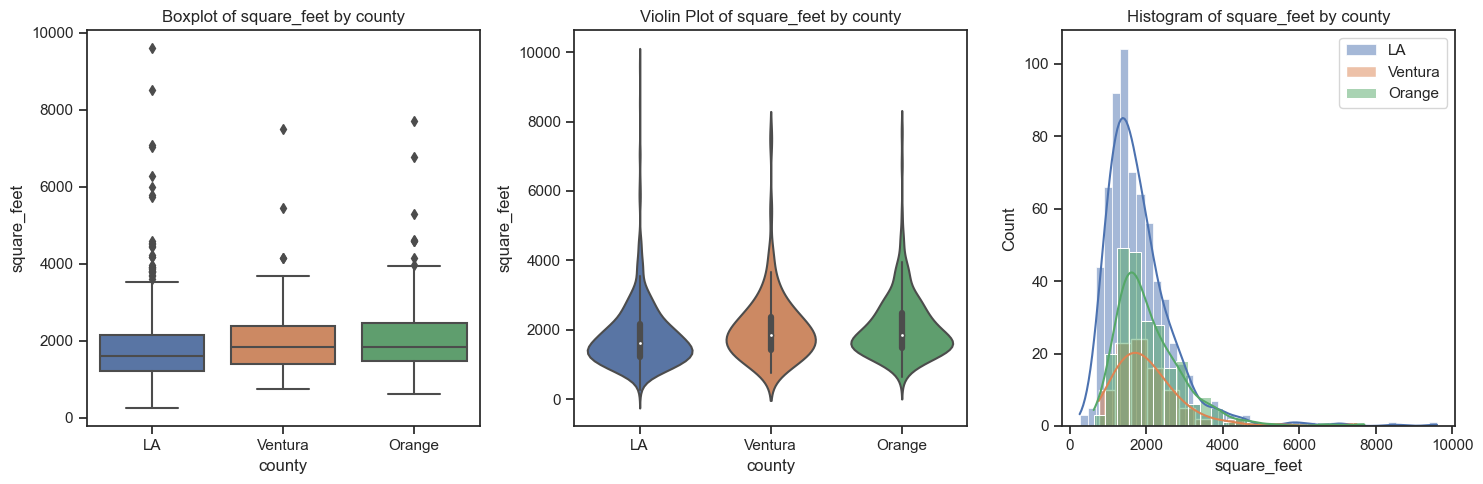

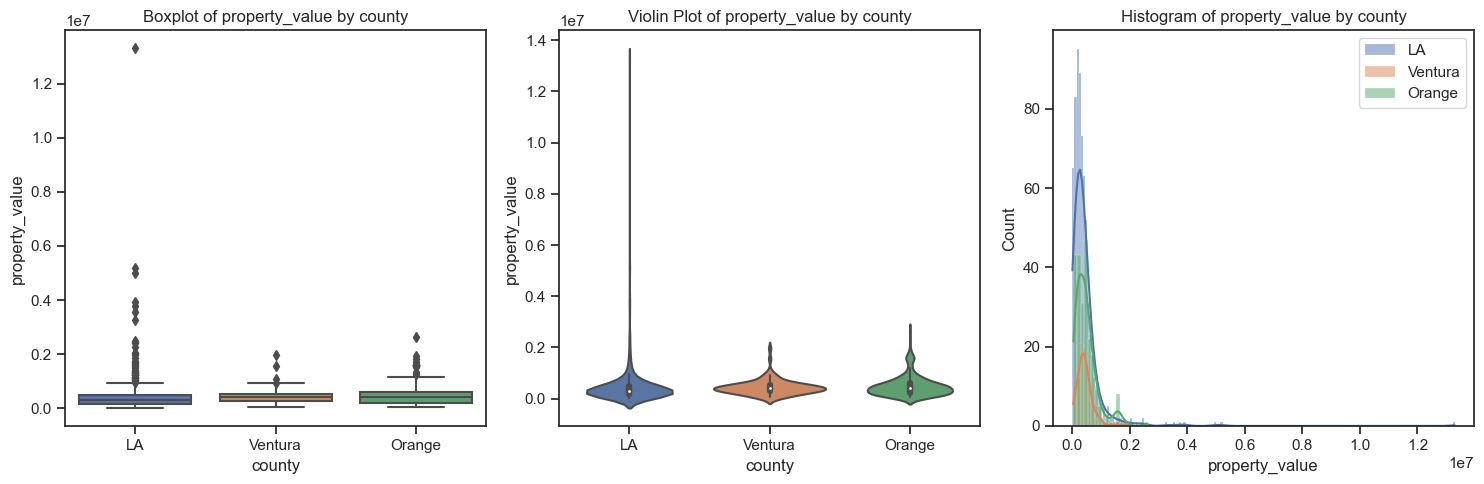

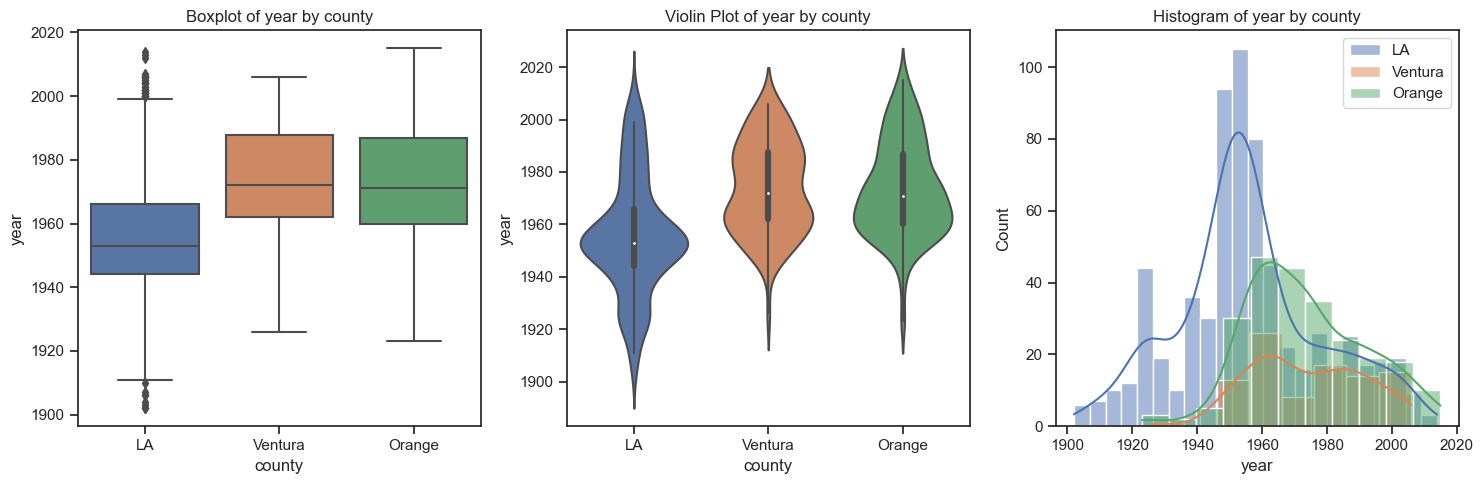

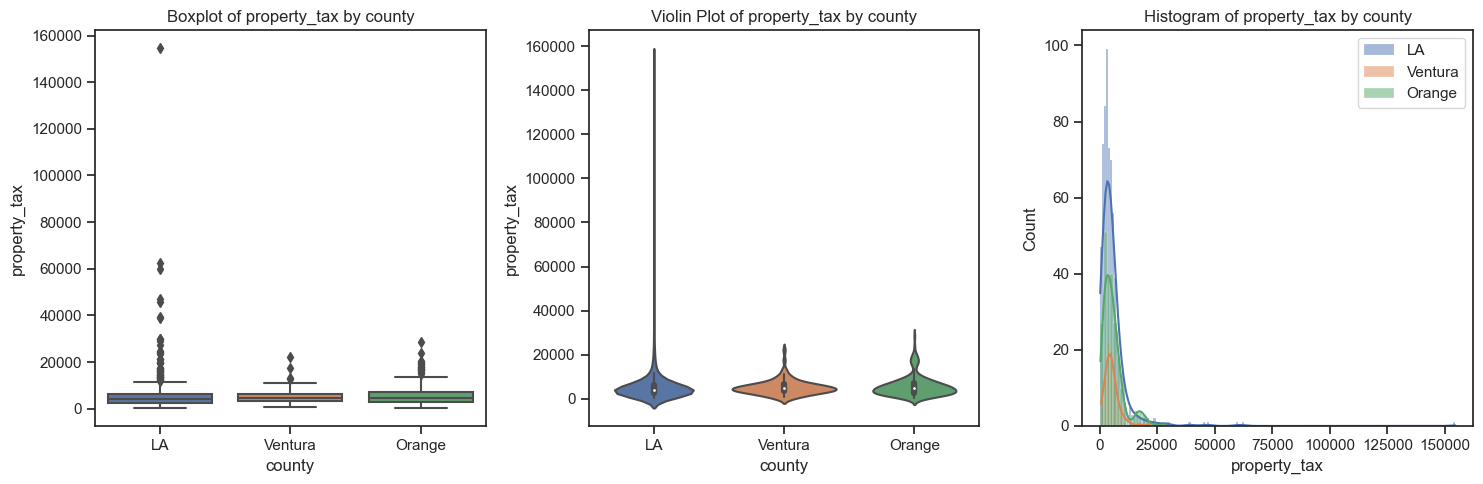

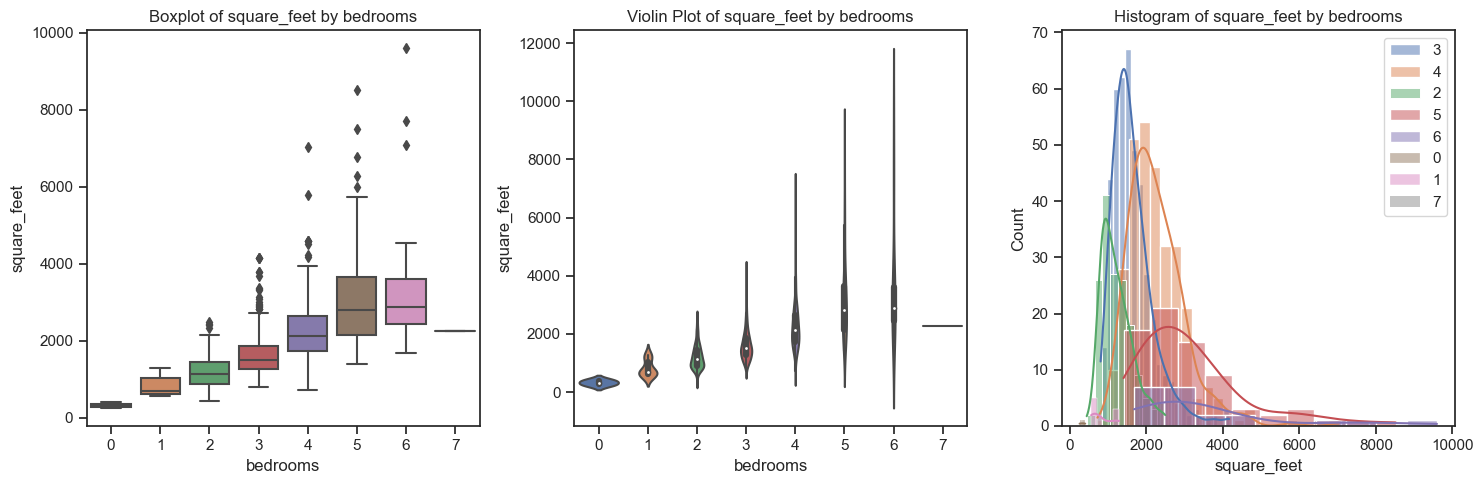

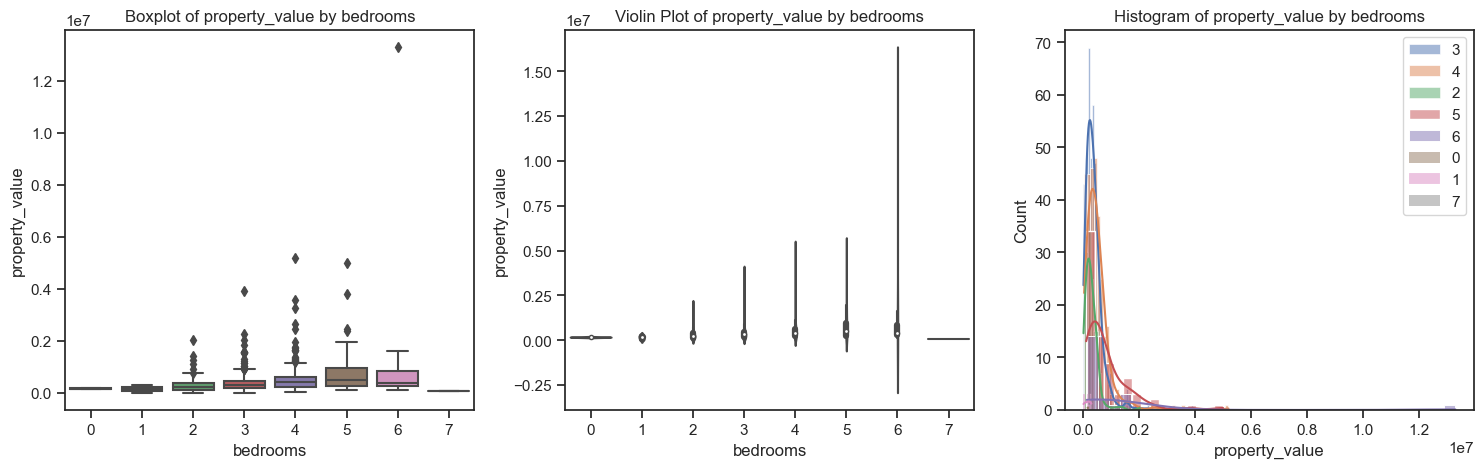

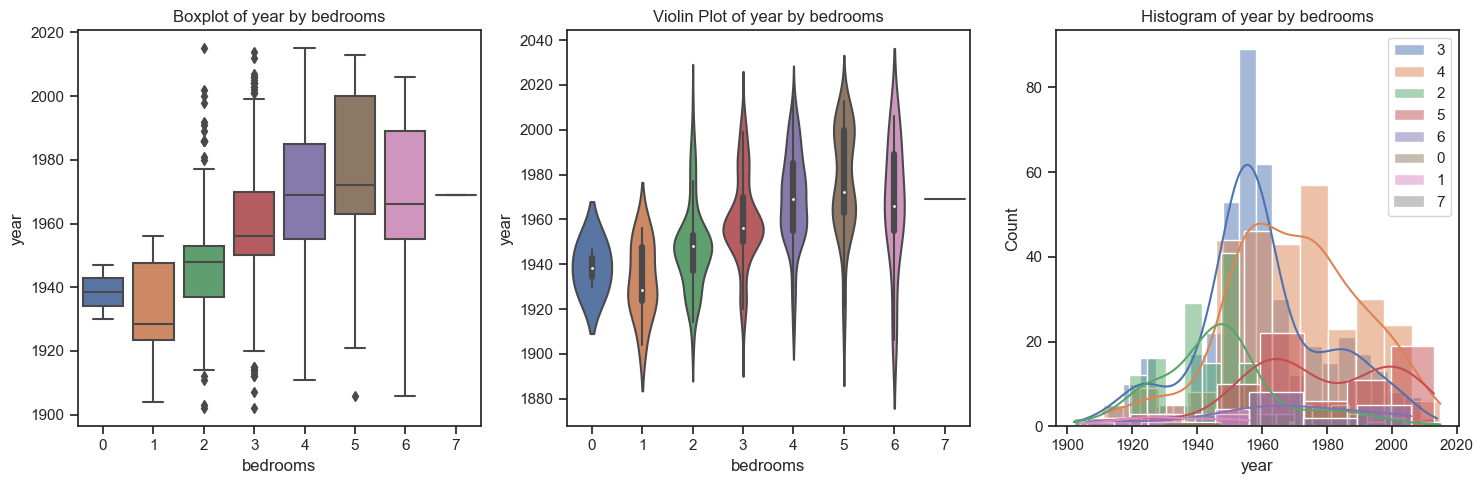

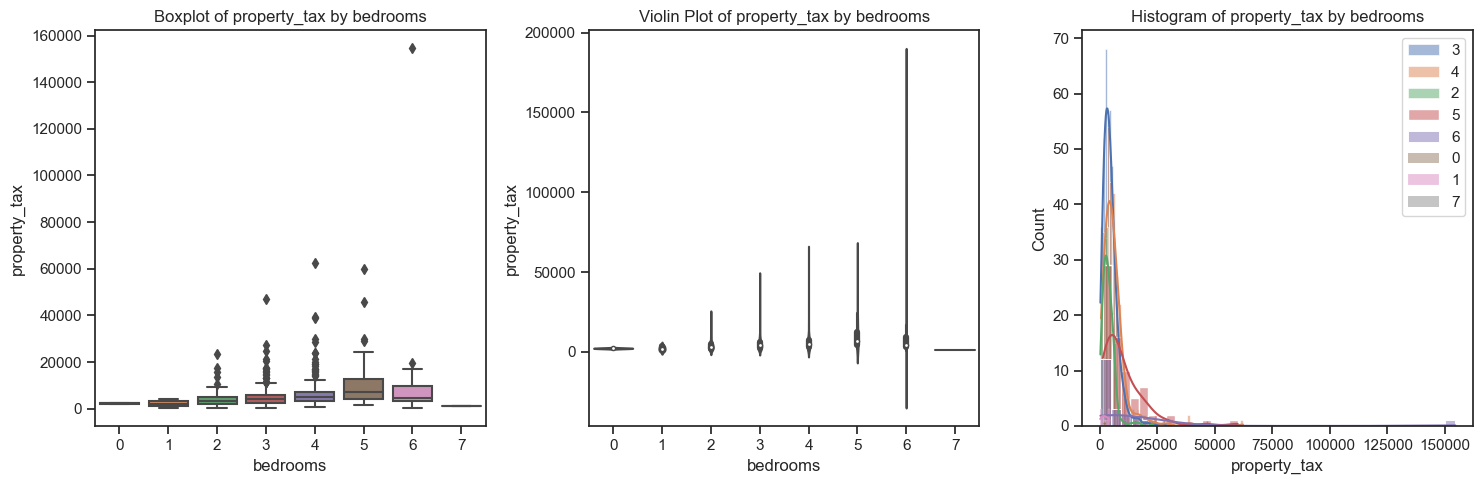

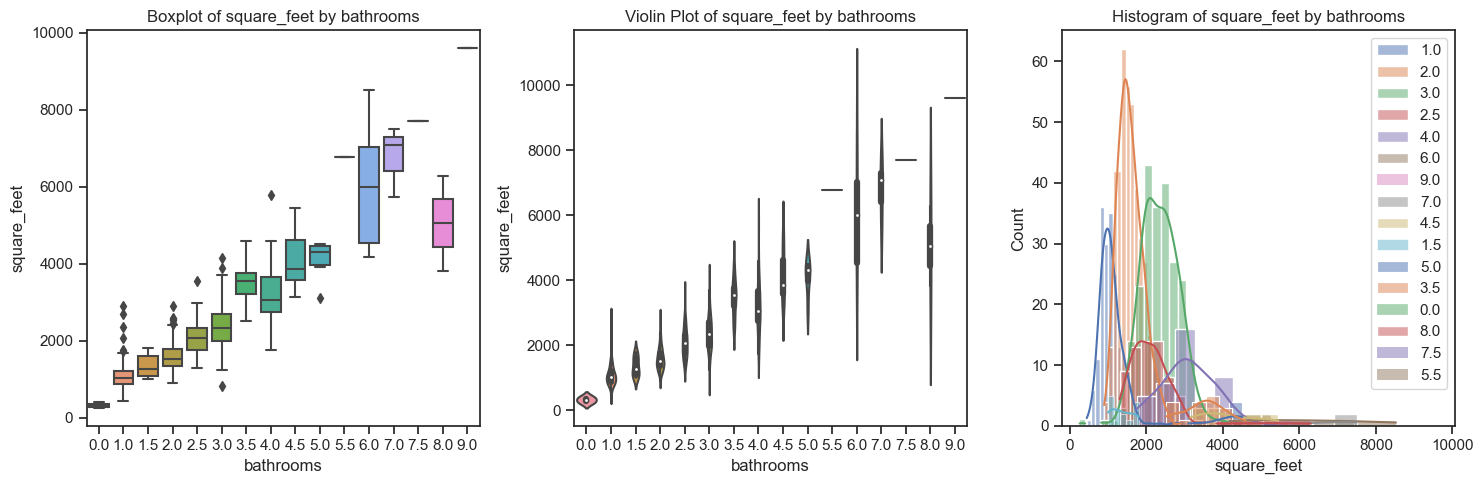

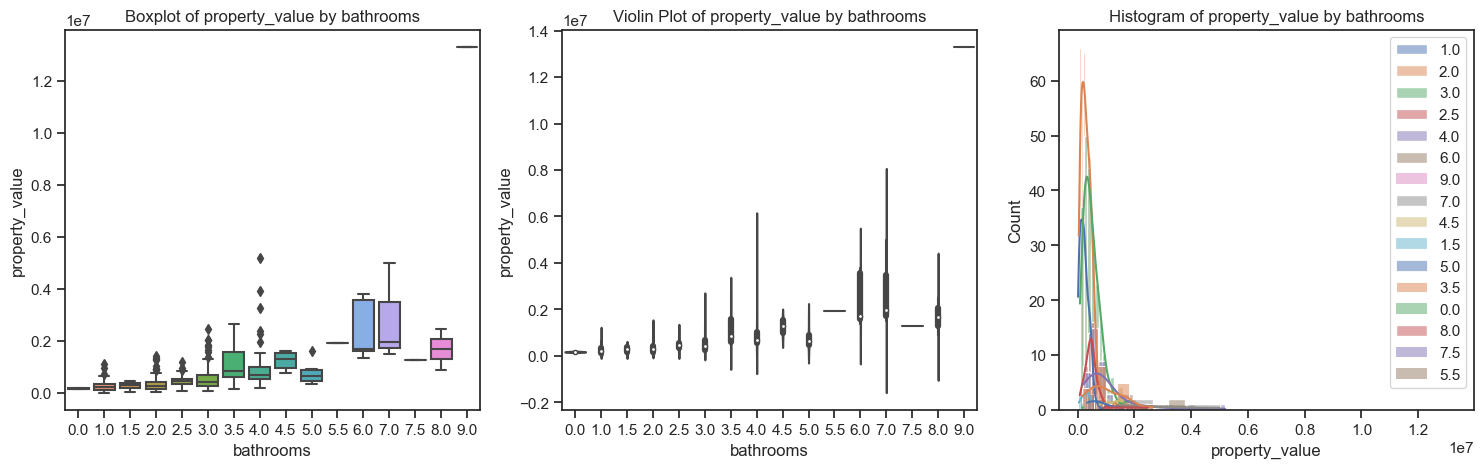

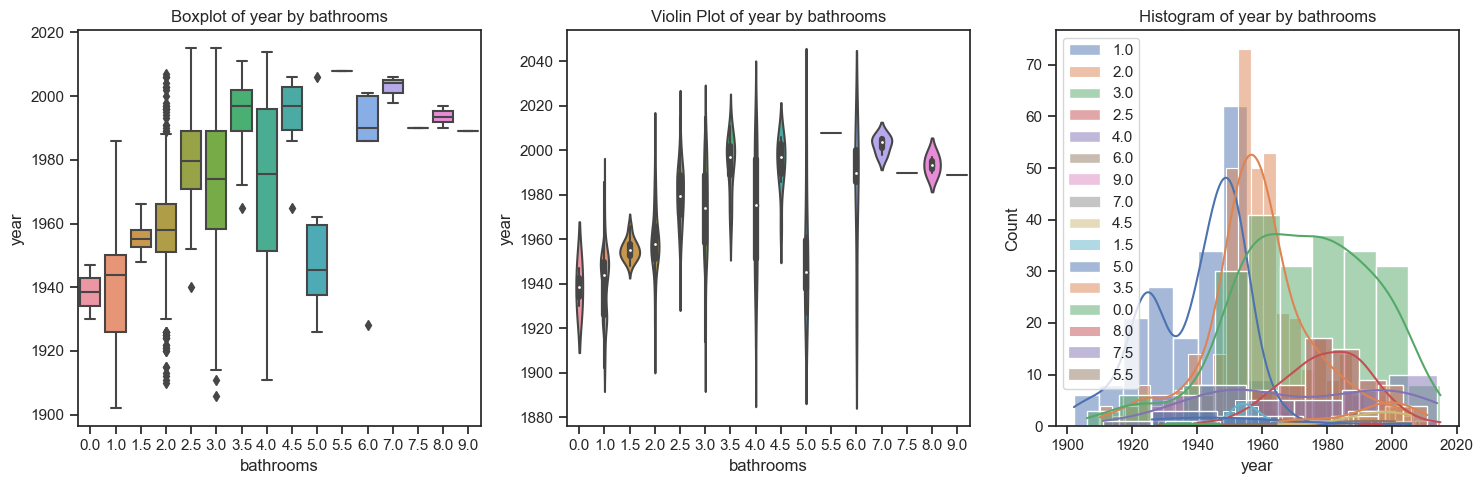

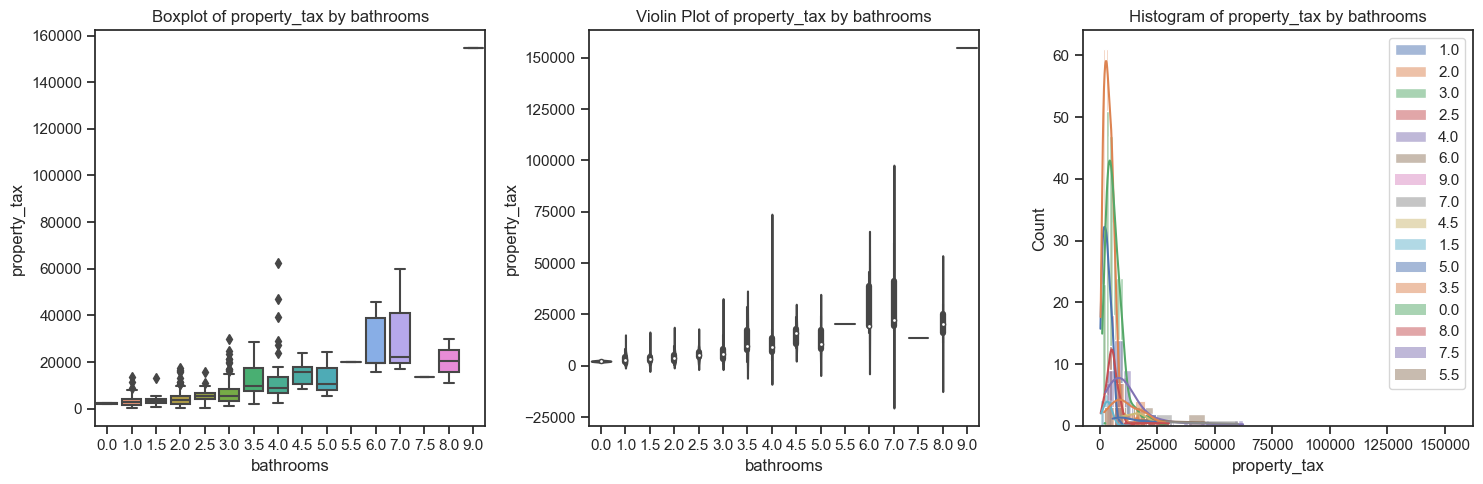

In [7]:
# Use function:
plot_categorical_and_continuous_vars(train.sample(1000), cat_cols=['county', 'bedrooms', 'bathrooms'], con_cols=['square_feet', 'property_value', 'year', 'property_tax'])


 
#### 3. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.
 

Functions are saved to an explore.py module in this repository to use in other notebooks.

 
 
#### 4. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.
 

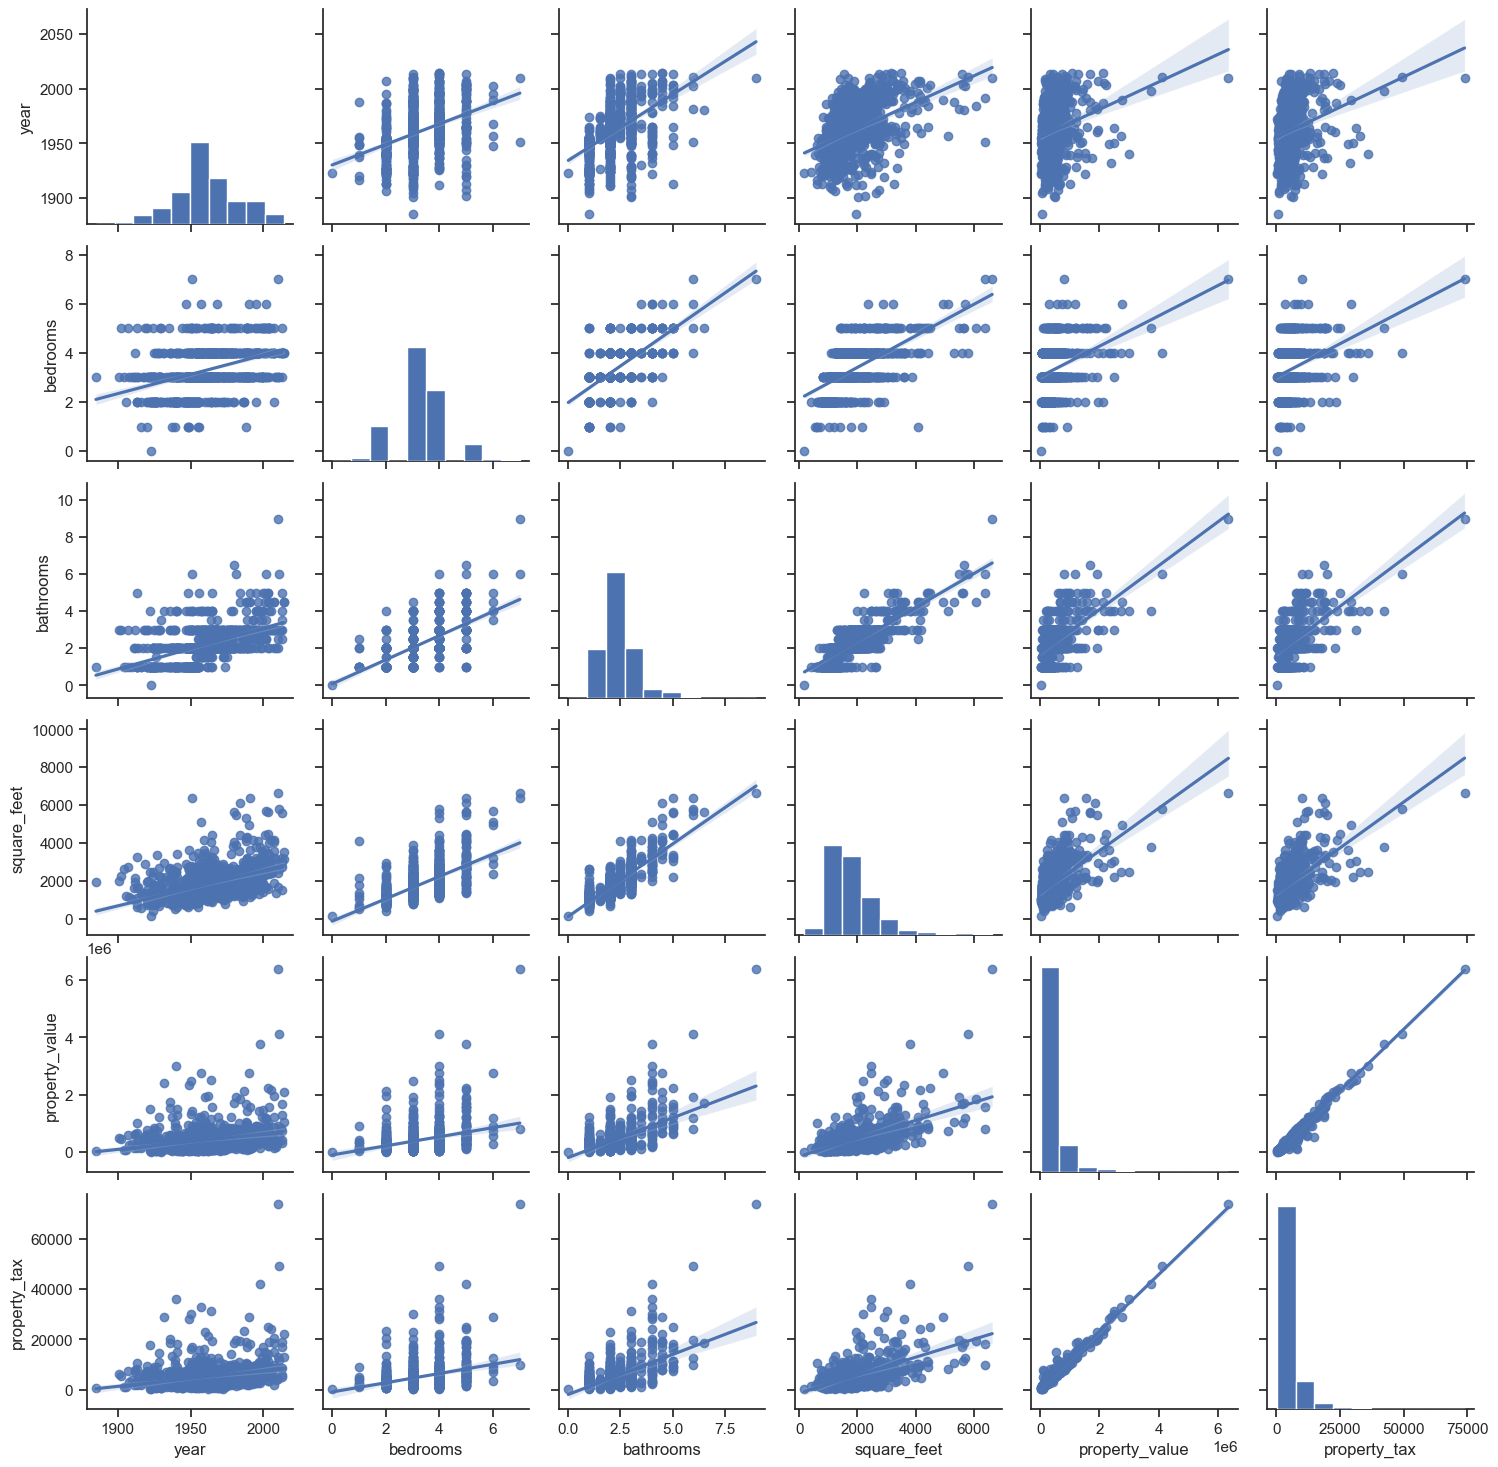

In [12]:
# using function from explore module
explore.plot_variable_pairs(train.sample(1000))

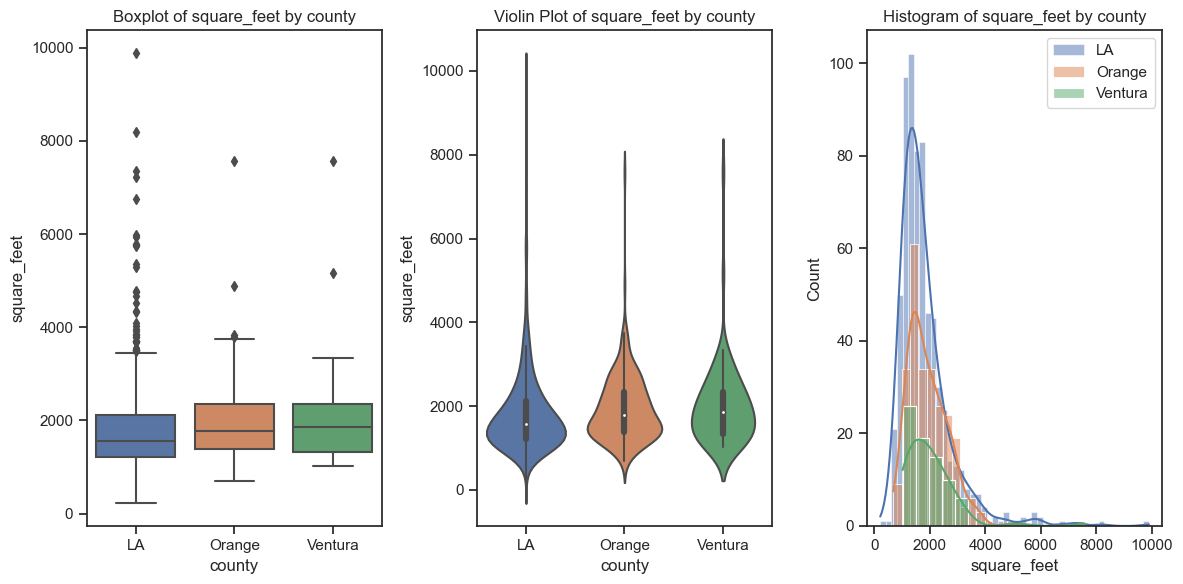

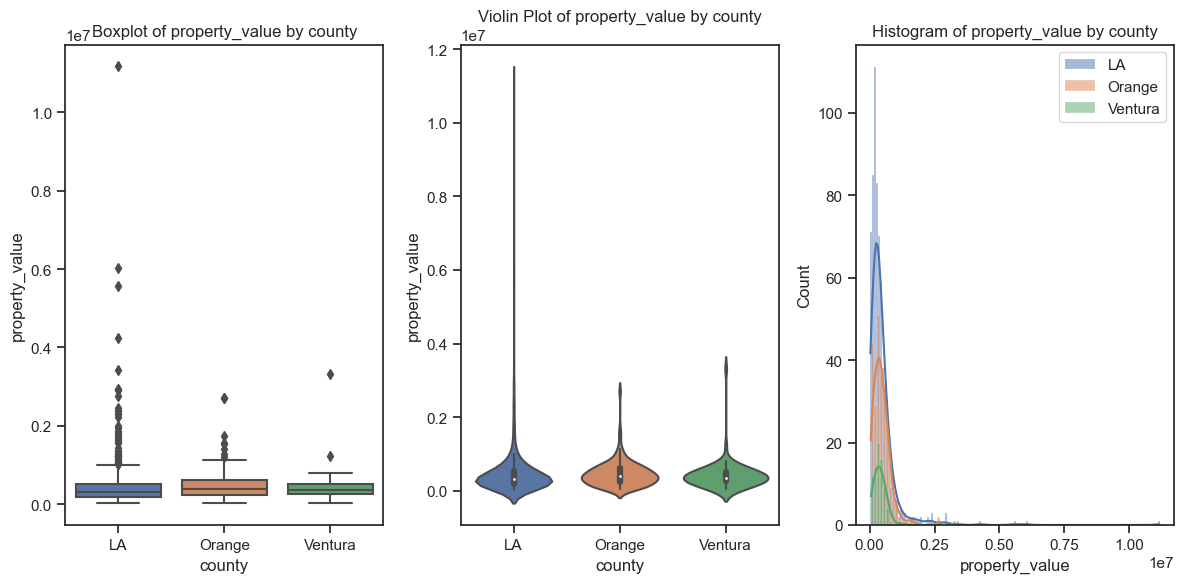

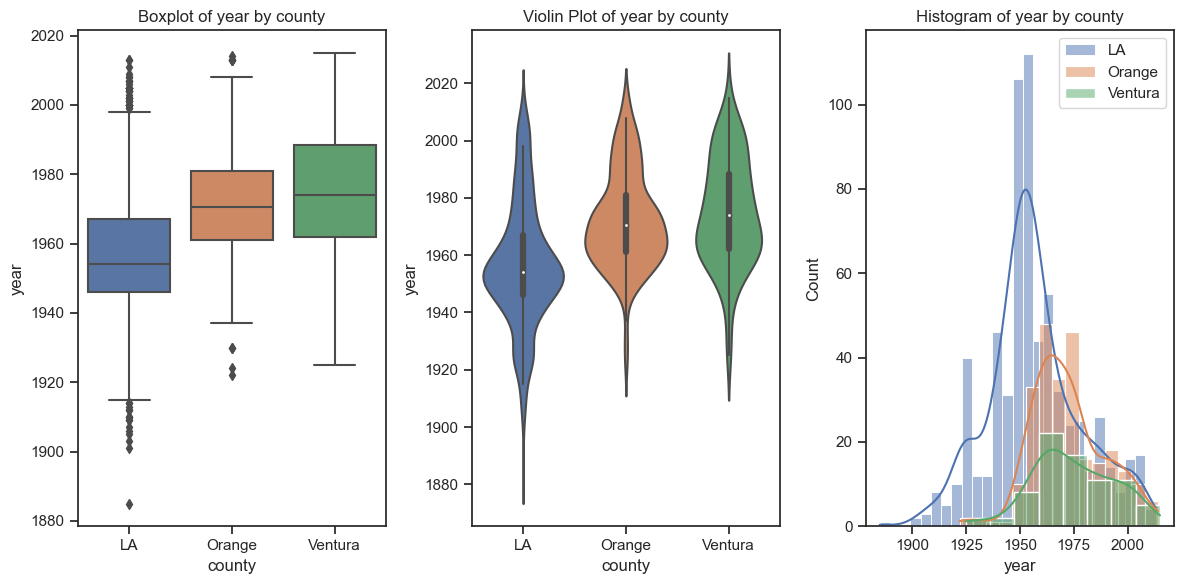

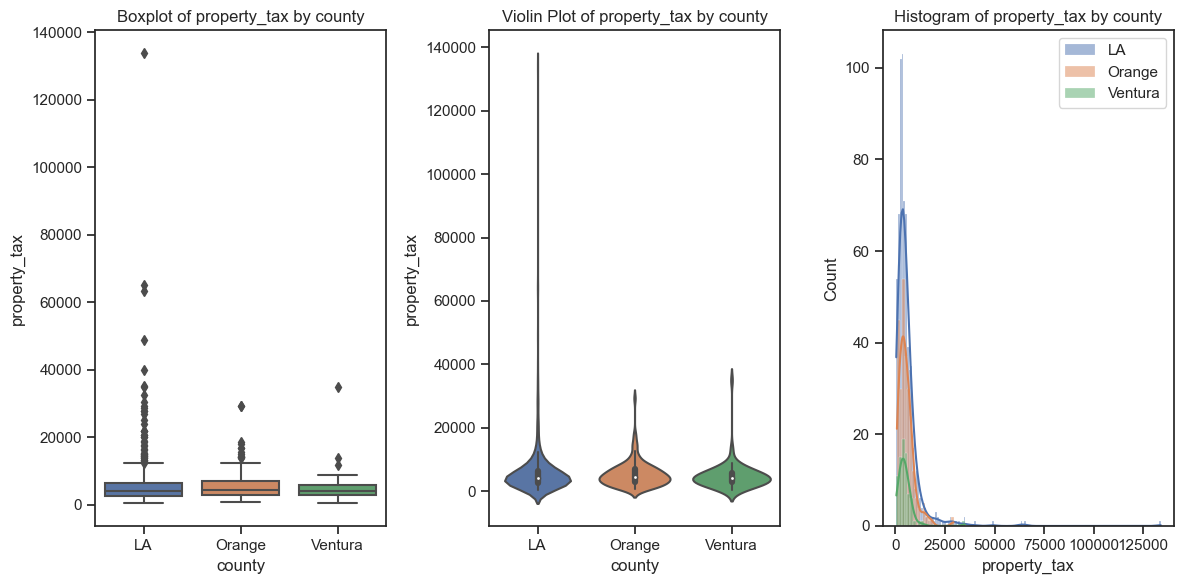

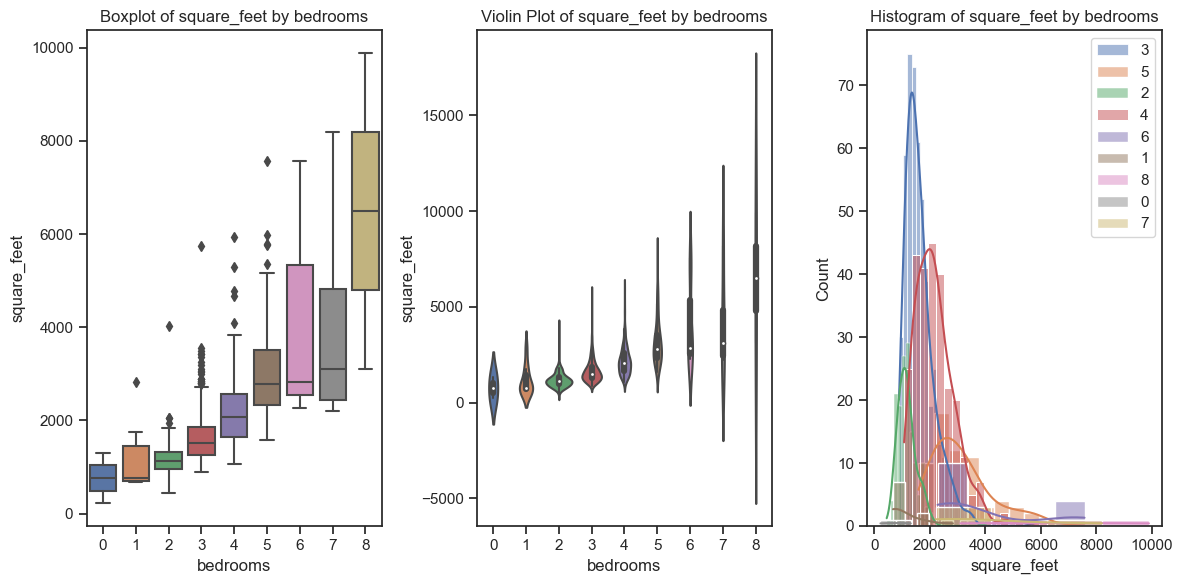

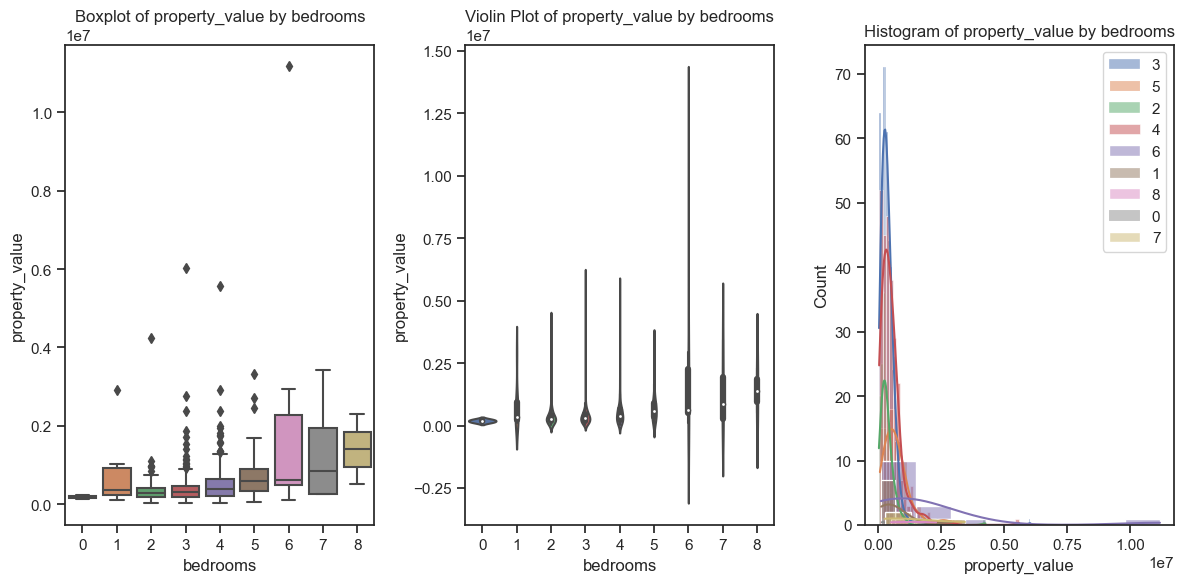

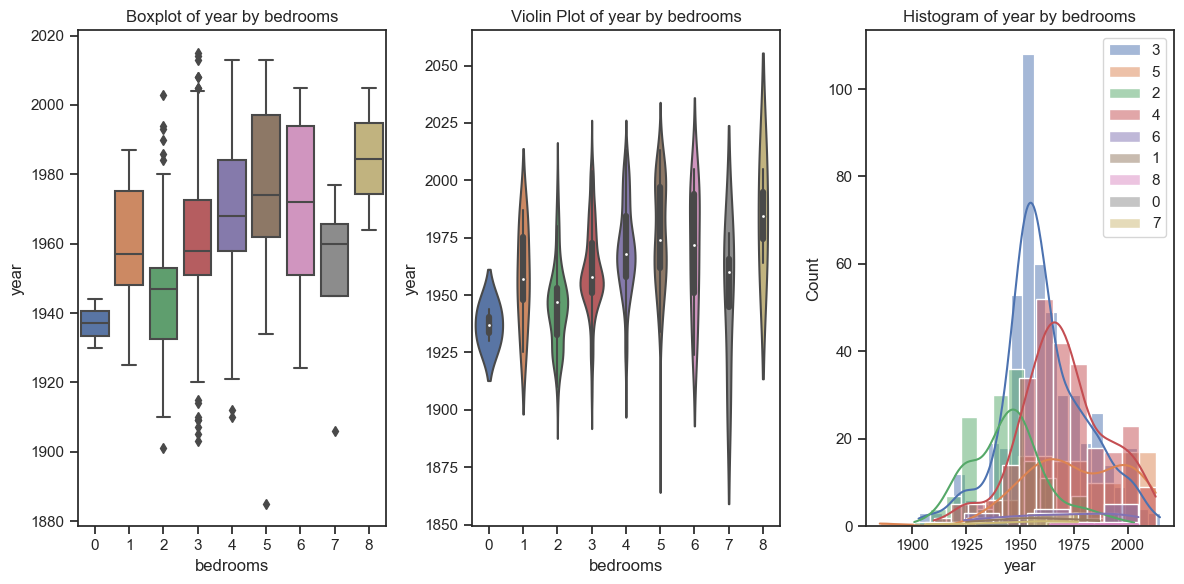

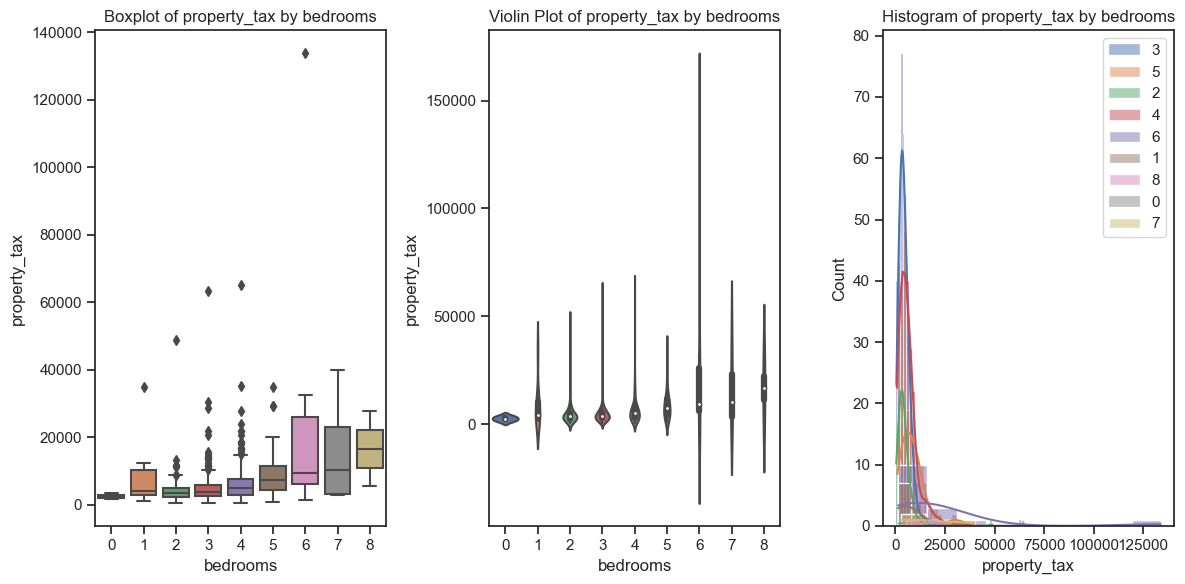

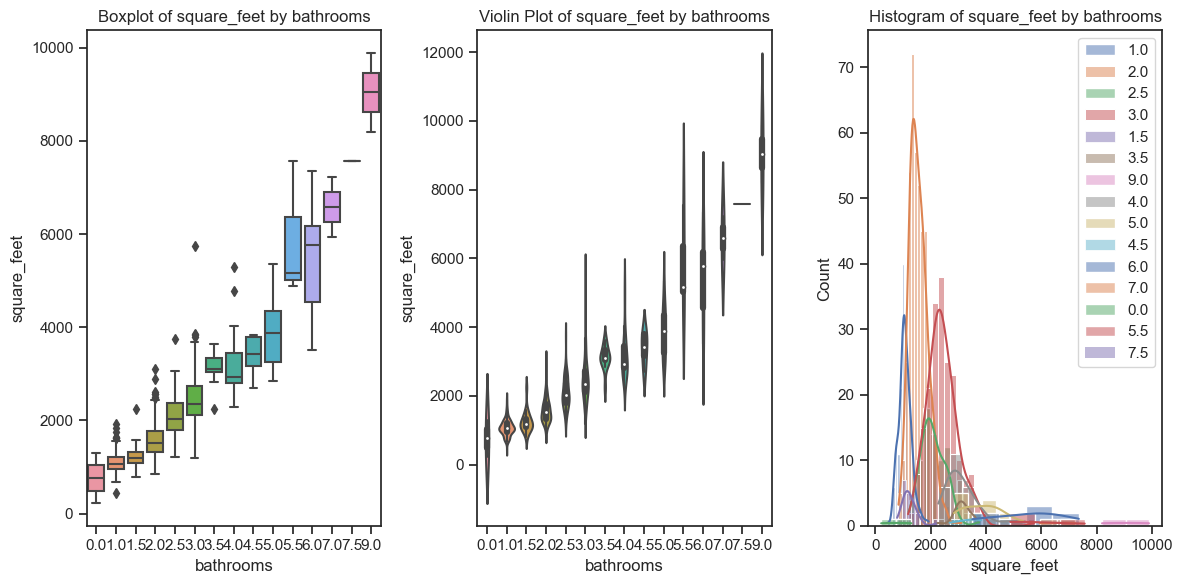

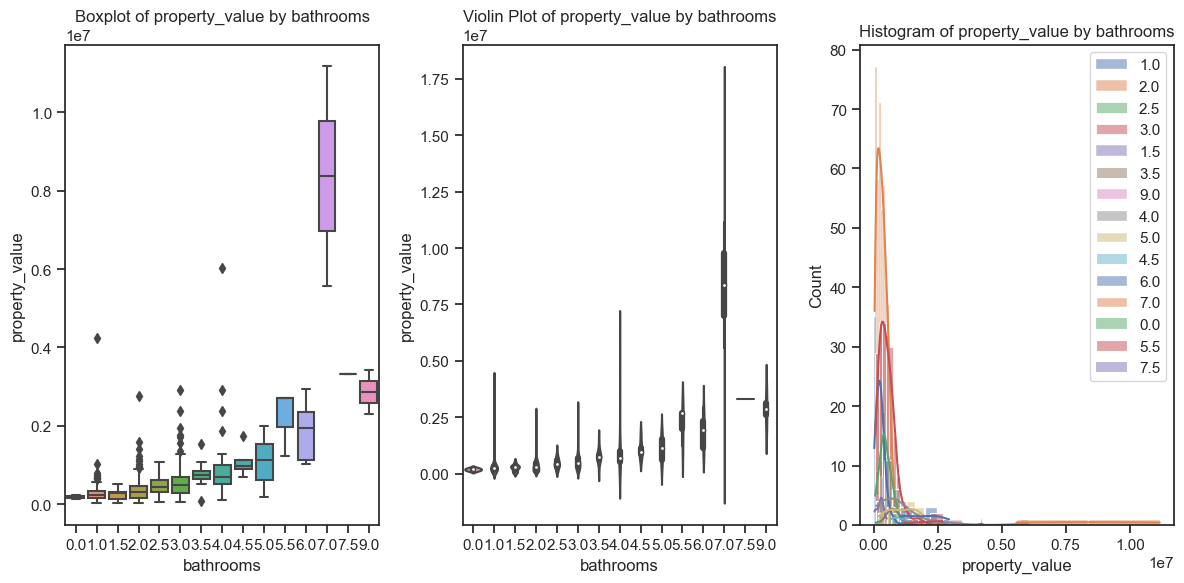

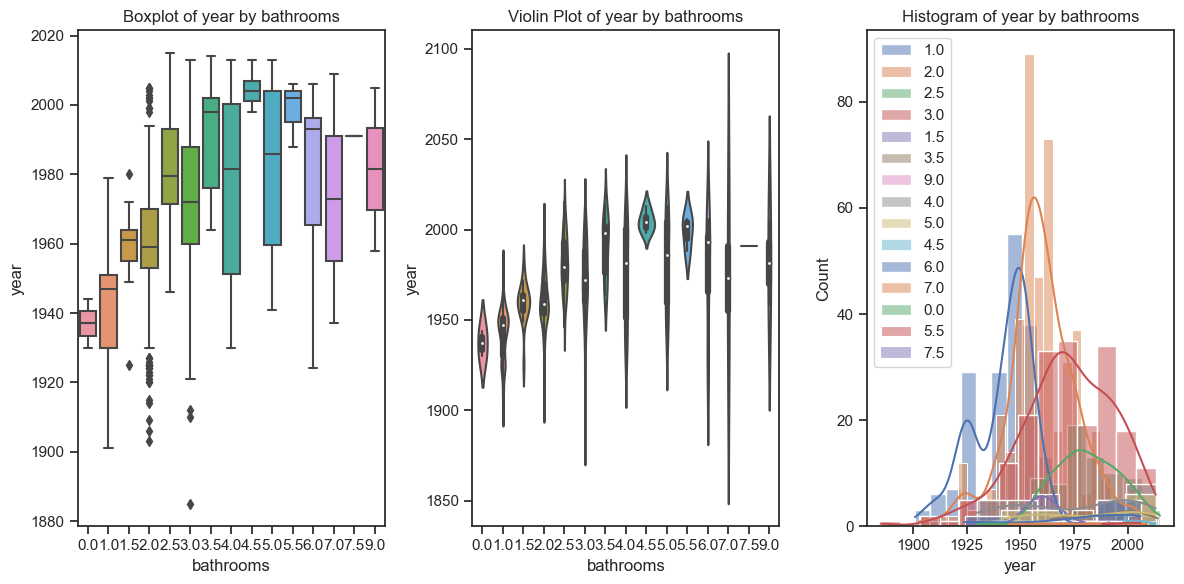

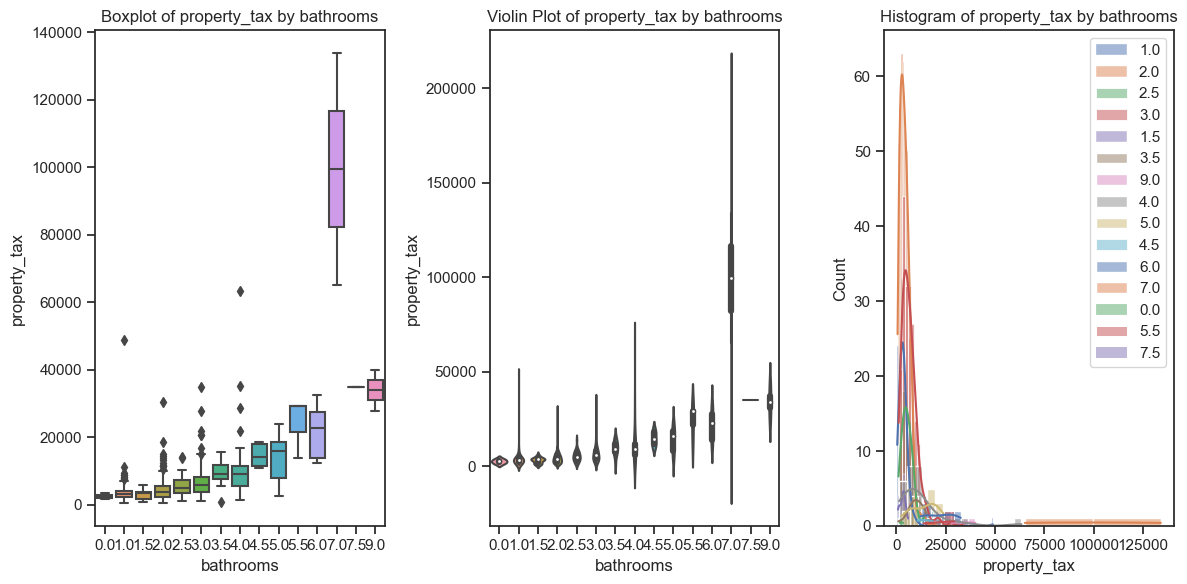

In [13]:
# assing as list of columns to a variable
cat_col= train [['county', 'bedrooms', 'bathrooms']]
con_col= train[['square_feet', 'property_value', 'year', 'property_tax']]

# using function from explore module
explore.plot_categorical_and_continuous_vars(train.sample(1000), cat_cols=cat_col, con_cols=con_col)


 
### 5. Come up with some initial hypotheses based on your goal of predicting property value.
 
 

Hypothesis:
𝐻0 : There is no correlation between year and prooperty value. 
𝐻𝑎 : There is significant correlation between year and property value.

Hypothesis:
𝐻0 : There is no correlation between the county location and property value. 
𝐻𝑎 : There is a significant correlation between the county location and property value.

Hypothesis:
𝐻0 : There is no correlation between the number of bedrooms and property value. 
𝐻𝑎 : There is a significant correlation between the number of bedrooms and property value. 

Hypothesis:
𝐻0 : There is no correlation between square feet and property value. 
𝐻𝑎 : There is a significant correlation between square feet and property value.


### 6. Visualize all combinations of variables in some way.
 

In [89]:
# function to visualize all combinations of variables when a pandas dataframe is passed.
def plot_variable_pairs(df):
    sns.set(style='ticks', context='talk')
    plt.style.use('fast')
    sns.pairplot(df, kind='reg', plot_kws={'scatter_kws': {'s': 1, 'color': 'red'}})
    plt.show()

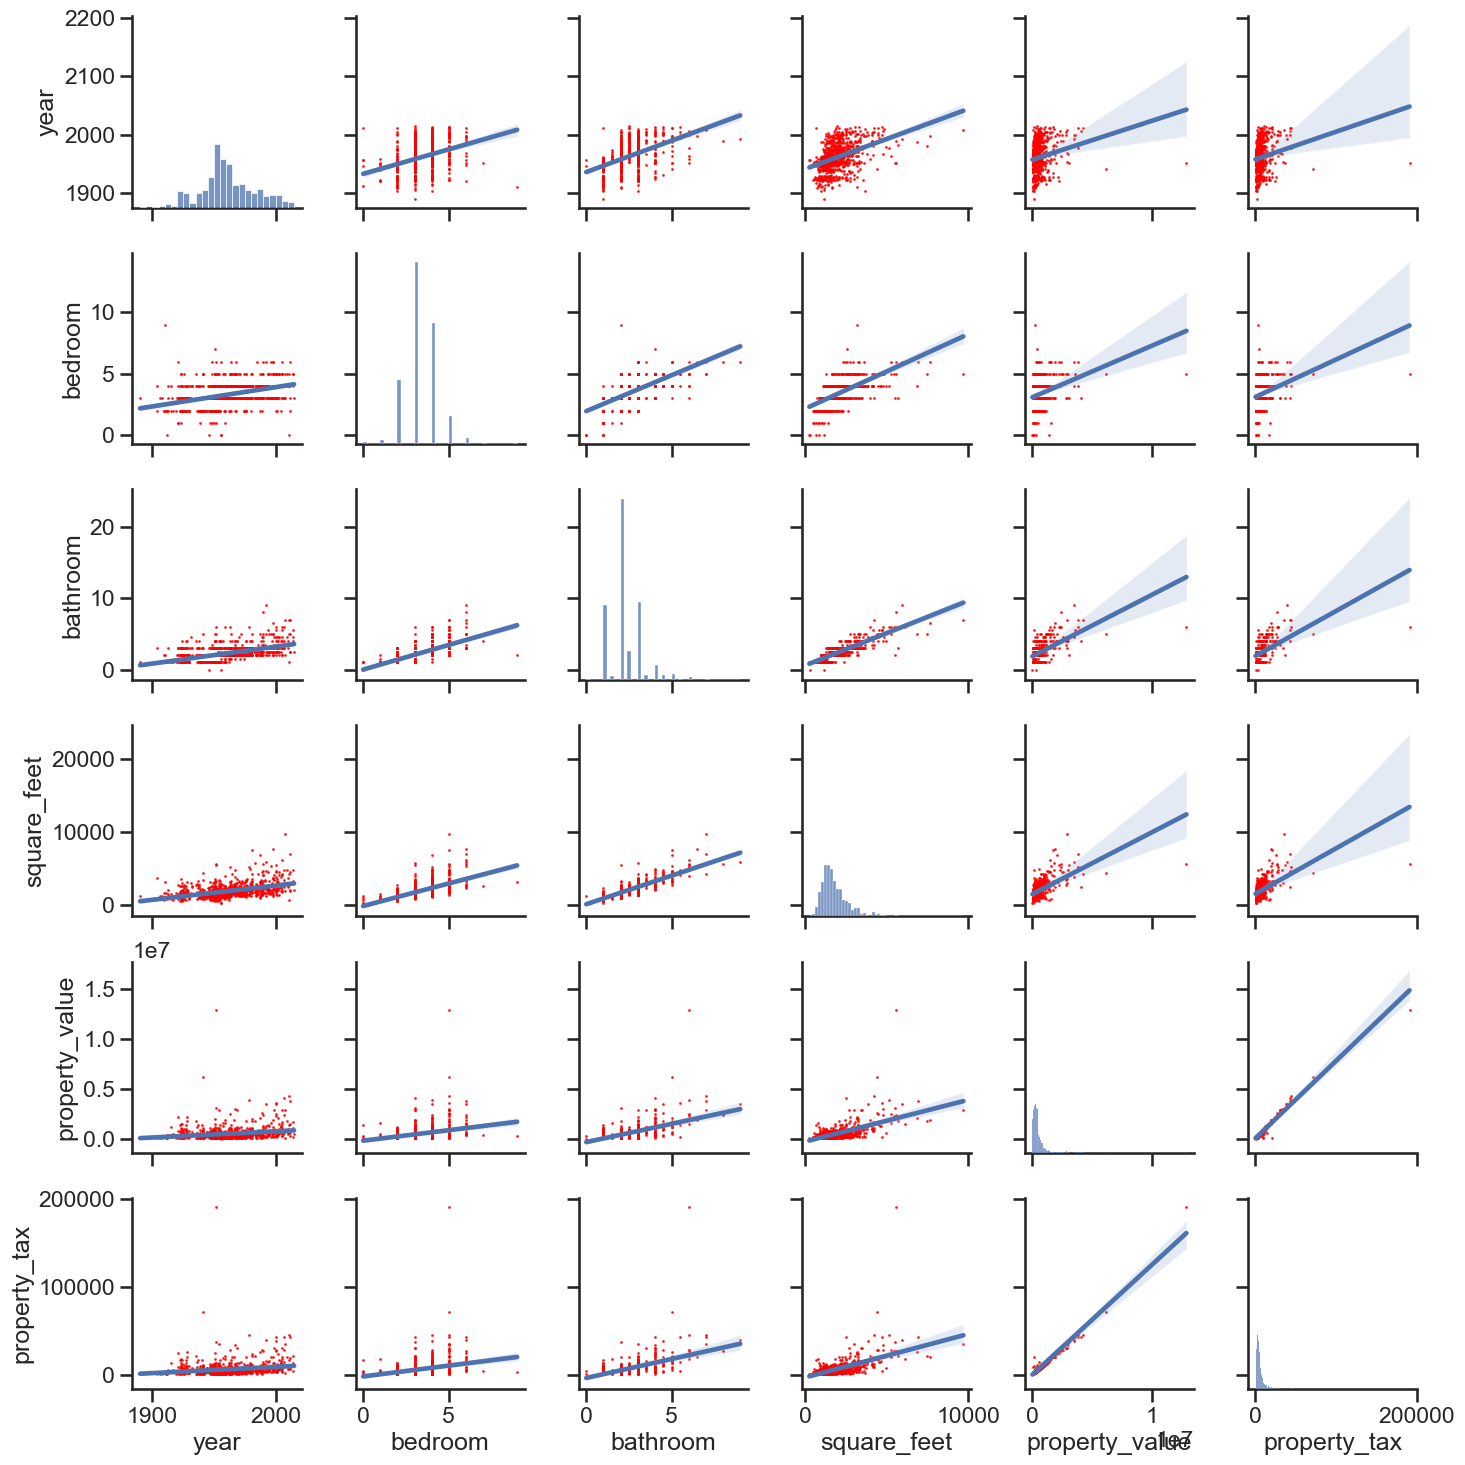

In [90]:
 plot_variable_pairs(train.sample(1000))

 
## 7. Run the appropriate statistical tests where needed.
 
 

###### Question 1: is there a relationship between deacde and property_value?

Hypothesis:
𝐻0 : The mean property_value for each decade is the same.
𝐻𝑎 : There are significant differences between the mean property_value for at least two decades.

In [34]:
# Create a new column 'decade' by binning the 'year' variable.
# 1800s is in one bin
bins = [1800, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
labels = ['1800s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
train['decade'] = pd.cut(train['year'], bins=bins, labels=labels)

In [35]:
# check out new column and year column to make sure it works
print(train[['year', 'decade']].sample(20))

         year decade
745290   1995  1990s
1817103  1959  1950s
2015325  1950  1950s
759630   1955  1950s
37778    1977  1970s
1522122  1949  1940s
1531035  1977  1970s
1024205  1941  1940s
1221756  1931  1930s
1388312  1986  1980s
559564   2006  2000s
1290420  1989  1980s
754382   1979  1970s
1114350  1970  1970s
391294   1932  1930s
9987     1969  1960s
1794644  1974  1970s
873847   1960  1960s
203300   1996  1990s
62586    1968  1960s


Assuming normal distribution and equal variance.

Hypothesis:

$H_0$: The mean property_value for each decade is the same.

$H_a$: There are significant differences between the mean property_value for at least two decades.

In [20]:
α = 0.05

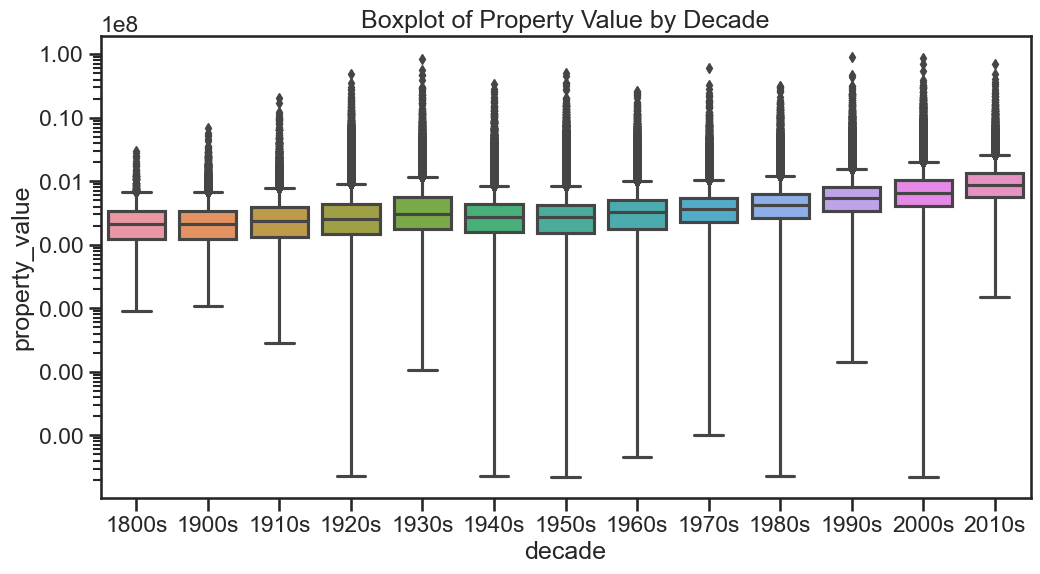

In [34]:
# Visualize!
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Boxplot with adjusted y-axis ticks
plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y='property_value', data=train)
plt.yscale('log')  # Use a logarithmic scale for better readability
plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Disable scientific notation
plt.title('Boxplot of Property Value by Decade')
plt.show()


In [23]:
# Analyze! (with stats test)
from scipy.stats import f_oneway

# Sort decades
decades = sorted(train['decade'].unique())

# Create a list to store the property values for each decade
property_values_by_decade = []

# Select property value for each decade and append to the list
for d in decades:
    mean_value = train[train['decade'] == d]['property_value']
    property_values_by_decade.append(mean_value)

# Perform ANOVA
f, p = f_oneway(*property_values_by_decade)

# Print ANOVA results
print("ANOVA F-statistic:", f)
print("ANOVA p-value:", p)


ANOVA F-statistic: 7536.303867316612
ANOVA p-value: 0.0


In [24]:
# interpret the results
if p < α:
    print('We can reject our null hypothesis and suggest that there is significant difference in mean property_values for at least two decades')
else:
    print('We fail to reject the null hypothesis')

We can reject our null hypothesis and suggest that there is significant difference in mean property_values for at least two decades


###### Question 2: is there a relationship between county and property_value?

Hypothesis:

$H_0$: The property_values for each county is the same.

$H_a$: There are significant differences between the property_values between counties.

In [54]:
α = 0.05

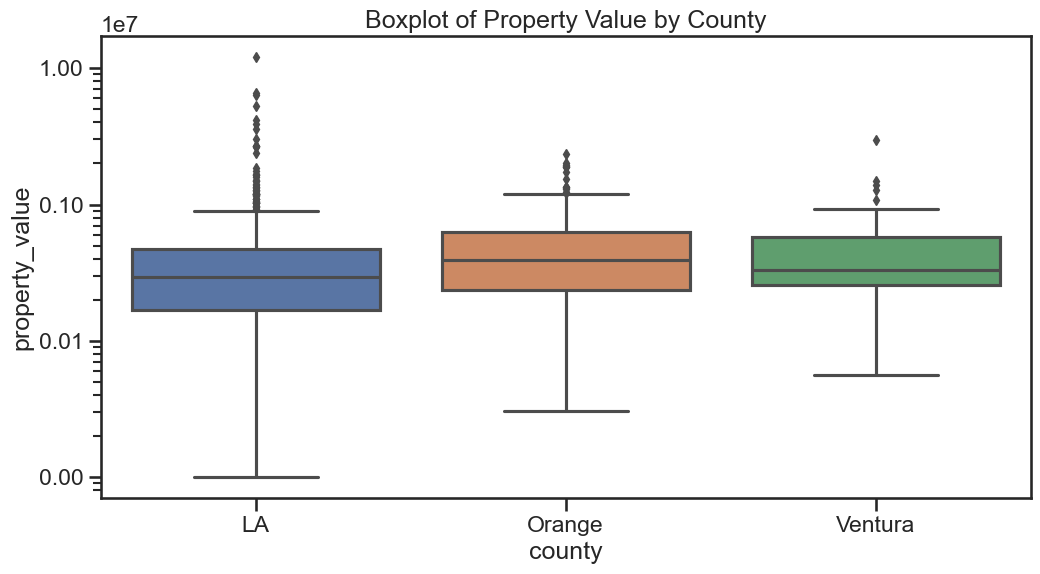

In [55]:
# visualize!


# Boxplot with adjusted y-axis ticks
plt.figure(figsize=(12, 6))
sns.boxplot(x='county', y='property_value', data=train.sample(1000))
plt.yscale('log')  # Use a logarithmic scale for better readability
plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Disable scientific notation
plt.title('Boxplot of Property Value by County')
plt.show()

In [56]:
# Analyze! (with stats test)
from scipy.stats import f_oneway

# Sort county
county = sorted(train['county'].unique())

# Create a list to store the property values for each county
property_values_by_county = []

# Select property value for each county and append to the list
for d in county:
    mean_value = train[train['county'] == d]['property_value']
    property_values_by_county.append(mean_value)

# Perform ANOVA
f, p = f_oneway(*property_values_by_county)

# Print ANOVA results
print("ANOVA F-statistic:", f)
print("ANOVA p-value:", p)


ANOVA F-statistic: 1981.9072001847737
ANOVA p-value: 0.0


In [58]:
# interpret the results
if p < α:
    print('We can reject our null hypothesis and suggest that there is significant difference in property_values for each county')
else:
    print('We fail to reject the null hypothesis')

We can reject our null hypothesis and suggest that there is significant difference in property_values for each county


#### 8. What independent variables are correlated with the dependent variable, home value?
 

Decade and County are correlated with the dependent variable, property value. 

 
#### 9. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?
 
 

year built vs square feet

Question: Is there a correlation between year built and square feet?

Hypothesis:

$H_0$: There is no correlation between year built and square feet.

$H_a$: There is a significant correlation between the year built and square feet.

In [38]:
α = 0.05

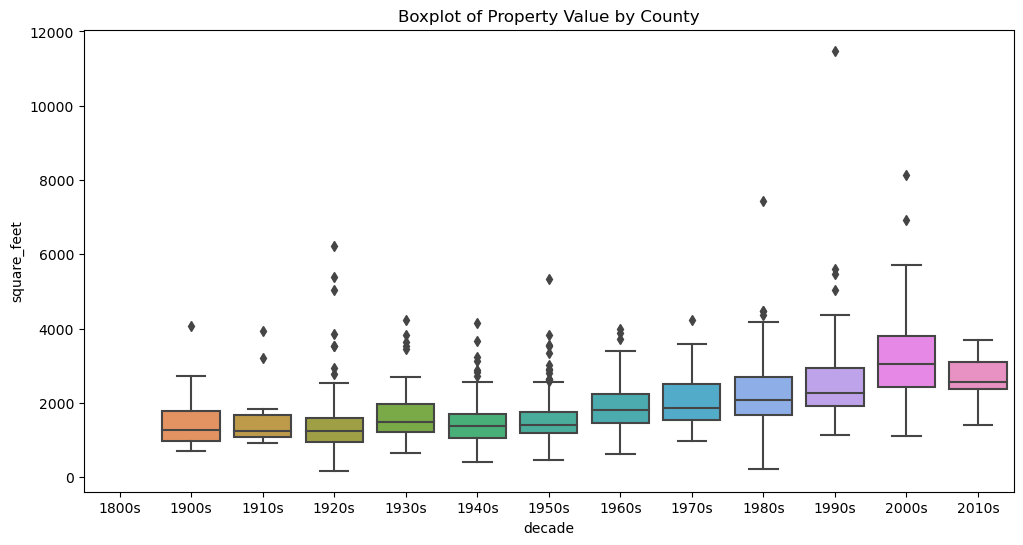

In [47]:
# visualize!


# Boxplot with adjusted y-axis ticks
plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y='square_feet', data=train.sample(1000))

plt.title('Boxplot of Property Value by County')
plt.show()

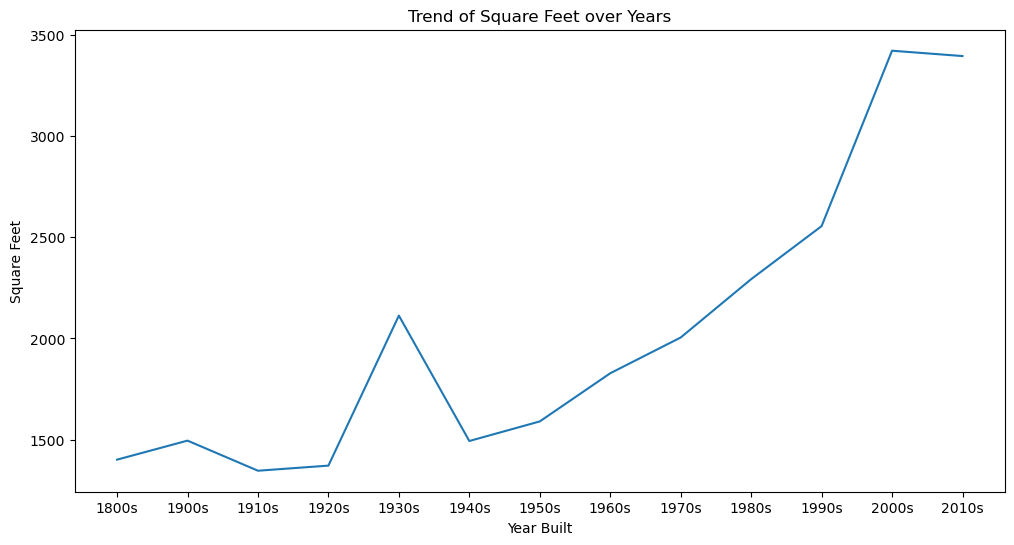

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='decade', y='square_feet', data=train.sample(1000), ci=None)
plt.title('Trend of Square Feet over Years')
plt.xlabel('Year Built')
plt.ylabel('Square Feet')
plt.show()


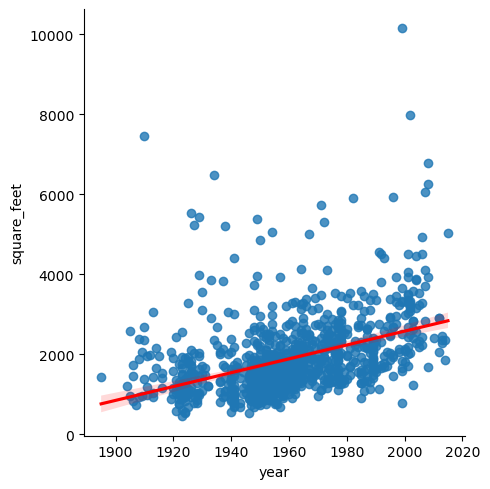

In [43]:
# I can really pop that line color if I want.

sns.lmplot(x="year", y="square_feet", data=train.sample(1000), line_kws={'color': 'red'})
plt.show()

In [48]:
from scipy.stats import kruskal

# 'decade' should be a categorical variable (e.g., created from the 'yearbuilt' variable)
decades = sorted(train['decade'].unique())

# Create a list of dataframes, each corresponding to a decade
square_feet_by_decade = []

for d in decades:
    mean_value = train[train['decade'] == d]['square_feet']
    square_feet_by_decade.append(mean_value)

# data_by_decade = [train[df['decade'] == decade]['calculatedfinishedsquarefeet'] for decade in decades]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*square_feet_by_decade)

print(f"H-statistic: {h_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference in square feet across decades.")
else:
    print("There is no significant difference in square feet across decades.")


H-statistic: 366219.07854685147
P-value: 0.0
There is a significant difference in square feet across decades.


In [37]:
# Analyze! (with stats test)
# This test assumes normal distribution. However, square_feet is not normally distributed. 
from scipy.stats import f_oneway

# Sort decades
decades = sorted(train['decade'].unique())

# Create a list to store the property values for each decade
square_feet_by_decade = []

# Select property value for each decade and append to the list
for d in decades:
    mean_value = train[train['decade'] == d]['square_feet']
    square_feet_by_decade.append(mean_value)

# Perform ANOVA
f, p = f_oneway(*square_feet_by_decade)

# Print ANOVA results
print("ANOVA F-statistic:", f)
print("ANOVA p-value:", p)


ANOVA F-statistic: 26136.427378386314
ANOVA p-value: 0.0


In [39]:
if p_value < alpha:
    print("There is a significant difference in square feet across decades.")
else:
    print("There is no significant difference in square feet across decades.")


There is a significant difference in square feet across decades.


Document Takeaway: There appears to be a significant difference in square feet across decades. By examining the visualizations, it appears sqaure footage for homes tends to increase over the decades. 

In [ ]:
bedrooms vs bathrooms

#### 10. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.
 
 

#### 11. Explore your dataset with any other visualizations you think will be helpful.
 
 
 

tax amount vs propery value